In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Class=0 为正常（非欺诈），Class=1 代表欺诈。

In [25]:
%%time
# 数据加载
data = pd.read_csv('../input/creditcard.csv')

CPU times: user 2.2 s, sys: 216 ms, total: 2.41 s
Wall time: 2.45 s


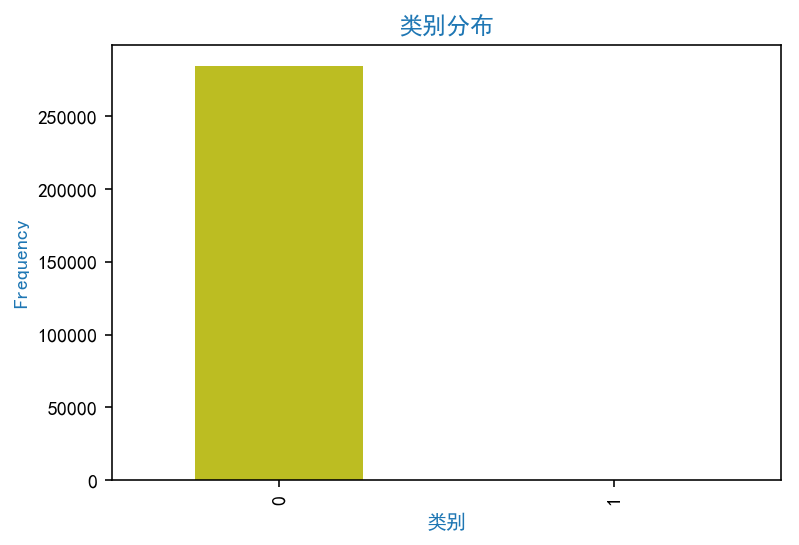

In [26]:
count_classes = data.Class.value_counts()
count_classes.plot(kind = 'bar', color = ['C8','C1'])
plt.title("类别分布", color = "C0")
plt.xlabel("类别", color = "C0")
plt.ylabel("Frequency", color = "C0")
plt.show()

可以看出欺诈的比例非常小。

In [27]:
all_normal = data[data['Class'] == 0]
all_fraud = data[data['Class'] == 1]
print('正常交易记录有 {} 条'.format(all_normal.shape[0]))
print('异常交易记录有 {} 条'.format(all_fraud.shape[0]))
print('异常交易记录比率 {0:.3%}'.format(all_fraud.shape[0]/all_normal.shape[0]))

正常交易记录有 284315 条
异常交易记录有 492 条
异常交易记录比率 0.173%


In [28]:
print("正常交易的时间描述信息\n", all_normal.Time.describe())
print("异常交易的时间描述信息\n", all_fraud.Time.describe())

正常交易的时间描述信息
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64
异常交易的时间描述信息
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


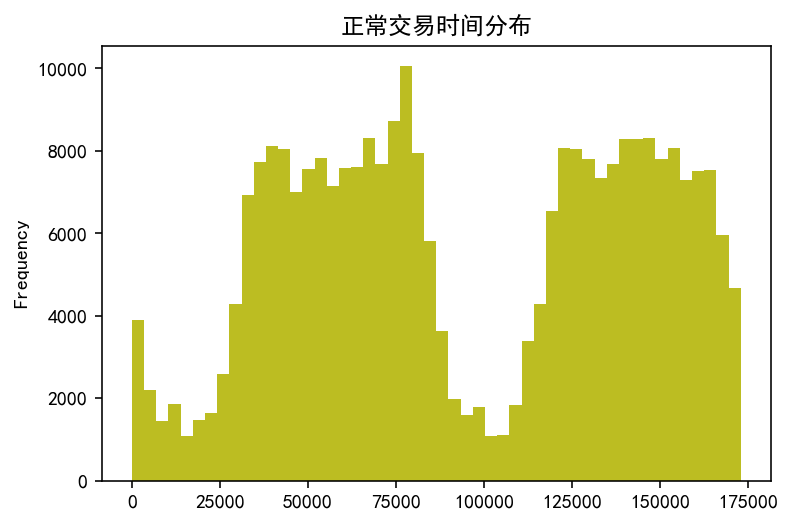

In [29]:
all_normal.Time.plot(kind='hist', bins=50, title = "正常交易时间分布", color = 'C8')

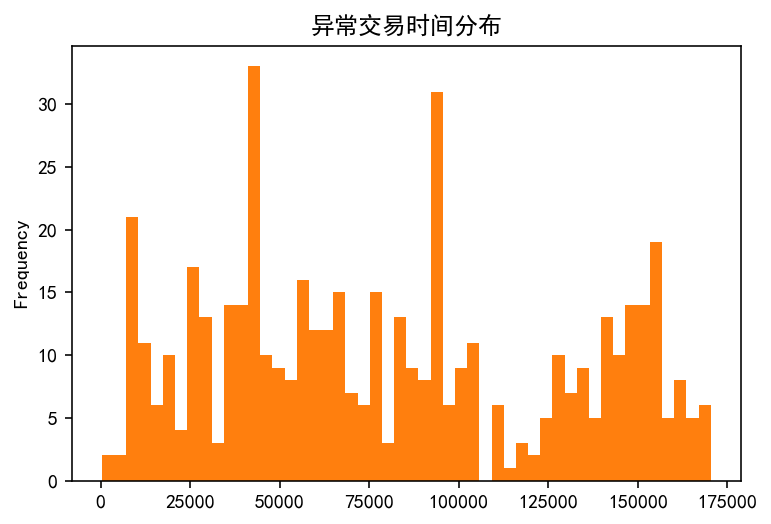

In [30]:
all_fraud.Time.plot(kind='hist', bins=50, title = "异常交易时间分布", color = 'C1')

In [31]:
print("正常交易的金额描述信息\n",all_normal.Amount.describe())
print("异常交易的金额描述信息\n",all_fraud.Amount.describe())

正常交易的金额描述信息
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
异常交易的金额描述信息
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Text(0, 0.5, '交易次数')

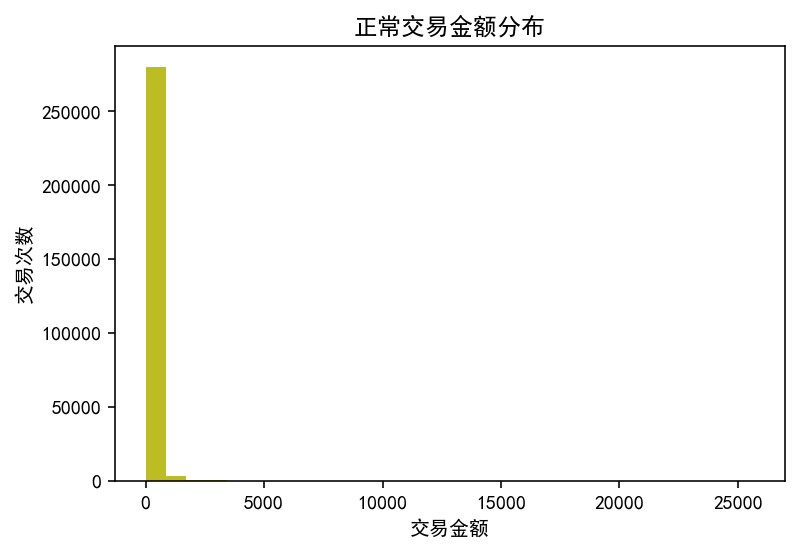

In [33]:
ax = all_normal.Amount.plot(kind='hist', bins=30, title = "正常交易金额分布", color = 'C8') 
ax.set_xlabel('交易金额')
ax.set_ylabel('交易次数')

Text(0, 0.5, '交易次数')

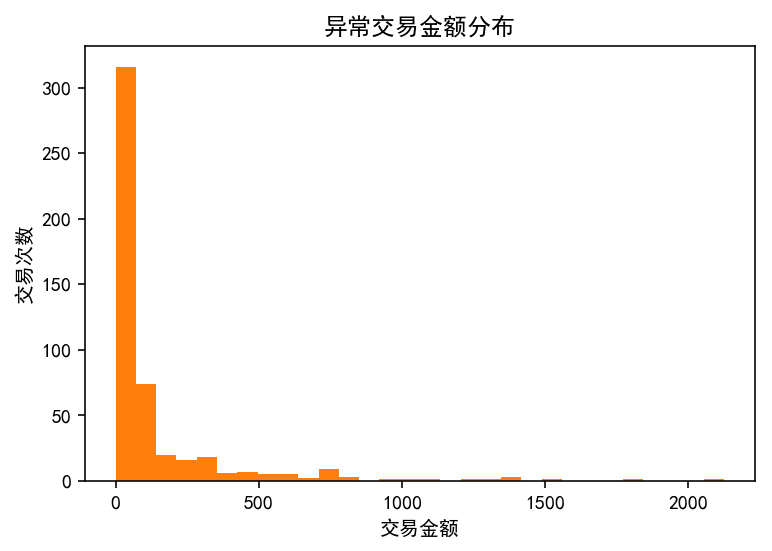

In [34]:
ax = all_fraud.Amount.plot(kind='hist', bins=30, title = "异常交易金额分布", color = 'C1')
ax.set_xlabel('交易金额')
ax.set_ylabel('交易次数')

In [35]:
from sklearn.preprocessing import StandardScaler

# reshape(-1,1) 将data['Amount']变成只有一列，行数不限定的np.array
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

print('未标准化的Amount：',data['Amount'].values.reshape(-1,1))
print('标准化后的Amount：',StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1)))

# 删除不需要使用到的两列数据
new_data = data.drop(['Time','Amount'], axis = 1)
new_data.head()

未标准化的Amount： [[149.62]
 [  2.69]
 [378.66]
 ...
 [ 67.88]
 [ 10.  ]
 [217.  ]]
标准化后的Amount： [[ 0.24496426]
 [-0.34247454]
 [ 1.16068593]
 ...
 [-0.0818393 ]
 [-0.31324853]
 [ 0.51435531]]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [36]:
X = np.array(new_data.iloc[:, new_data.columns != 'Class']) # 选取特征列数据
y = np.array(new_data.iloc[:, new_data.columns == 'Class']) # 选取类别label
print('X shape:',X.shape, '\ny shape:',y.shape)

X shape: (284807, 29) 
y shape: (284807, 1)


In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('训练集的交易记录条数：',X_train.shape[0])
print('测试集的交易记录条数：',X_test.shape[0])
print('交易记录总数：',X_train.shape[0] + X_test.shape[0])
print('上采样前，类别为‘1’的共有{}个，类别为‘0’的共有{}个。'.format(sum(y_train==1),sum(y_train==0)))
print('------------------------')

# 对训练集进行上采样处理
smote = SMOTE(random_state=2)
X_train_os,y_train_os = smote.fit_sample(X_train, y_train.ravel()) # ravel(): change the shape of y to (n_samples, )

print('上采样后，训练集的交易记录条数：', len(X_train_os))
print('其中，训练集X的shape:',X_train_os.shape,'，y的shape:',y_train_os.shape)
print('交易记录总数：',X_train_os.shape[0] + X_test.shape[0])
print('上采样后，类别为‘1’的共有{}个，类别为‘0’的共有{}个。'.format(sum(y_train_os==1),sum(y_train_os==0)))


训练集的交易记录条数： 199364
测试集的交易记录条数： 85443
交易记录总数： 284807
上采样前，类别为‘1’的共有[345]个，类别为‘0’的共有[199019]个。
------------------------
上采样后，训练集的交易记录条数： 398038
其中，训练集X的shape: (398038, 29) ，y的shape: (398038,)
交易记录总数： 483481
上采样后，类别为‘1’的共有199019个，类别为‘0’的共有199019个。


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve, auc, recall_score, classification_report

In [40]:
# 定义正则化权重参数，用以控制过拟合
paramaters = {'C':np.linspace(1,10, num=10)} # generate sequnce: start = 1, stop = 10
paramaters
# C_param_range = [0.01,0.1,1,10,100]

{'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])}

In [41]:
lr = LogisticRegression()
# 5 folds, 3 jobs run in parallel
lr_clf = GridSearchCV(lr, paramaters, cv=5, n_jobs=3, verbose=5) 
lr_clf.fit(X_train_os, y_train_os.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   33.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  2.1min finished
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [42]:
print('最好的参数：',lr_clf.best_params_)

最好的参数： {'C': 4.0}


In [43]:
lr1 = LogisticRegression(C=4, penalty='l1',verbose=5)
lr1.fit(X_train_os, y_train_os.ravel())

[LibLinear]

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

In [44]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 92.17391304347827%


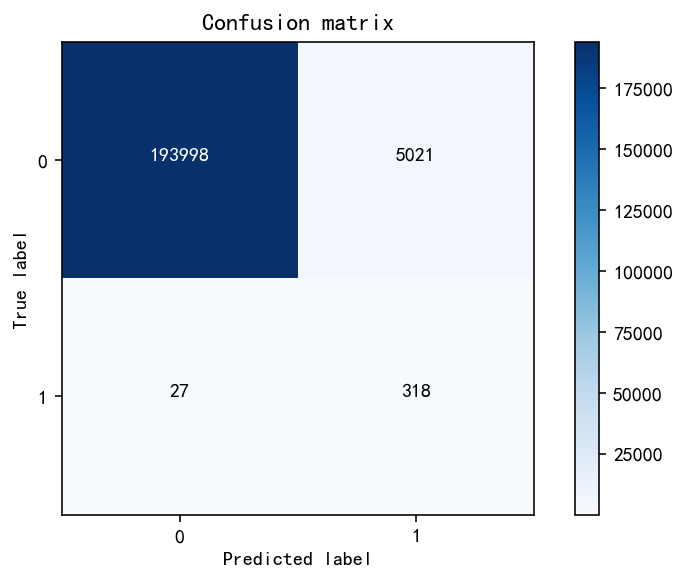

In [45]:
# 对原训练集X进行预测
y_train_pre = lr1.predict(X_train)

# 训练集的混淆矩阵
cnf_matrix_train = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_train , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the test dataset: 91.83673469387755%


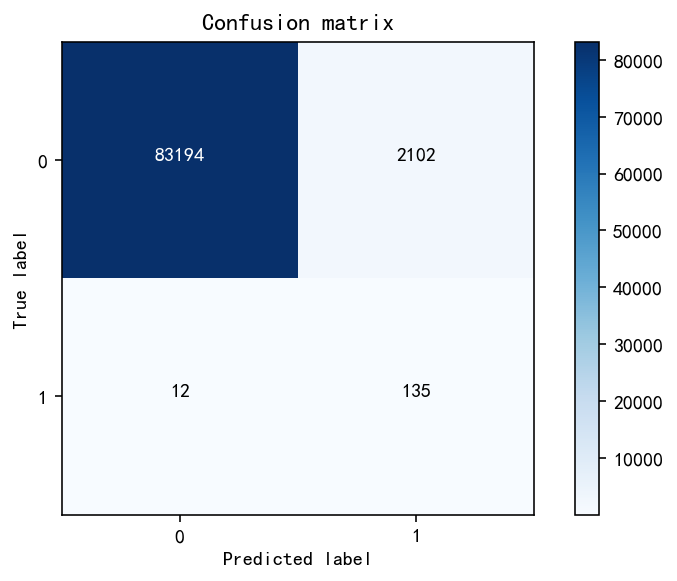

In [46]:
# 对原测试集进行预测
y_pre = lr1.predict(X_test)

# 测试集的混淆矩阵
cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the test dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()


In [47]:
model = lr1.fit(X_train_os, y_train_os.ravel())

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



[LibLinear]

In [48]:
# decision_function(): Predict confidence scores for samples X_test.
y_pred_sample_score = model.decision_function(X_test)  
y_pred_sample_score

array([-1.62118193, -1.5476746 , -1.63636111, ..., -2.96774639,
       -2.12554216, -1.87011558])

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr, tpr)
print('准确率：',roc_auc)

准确率： 0.9839093346961745


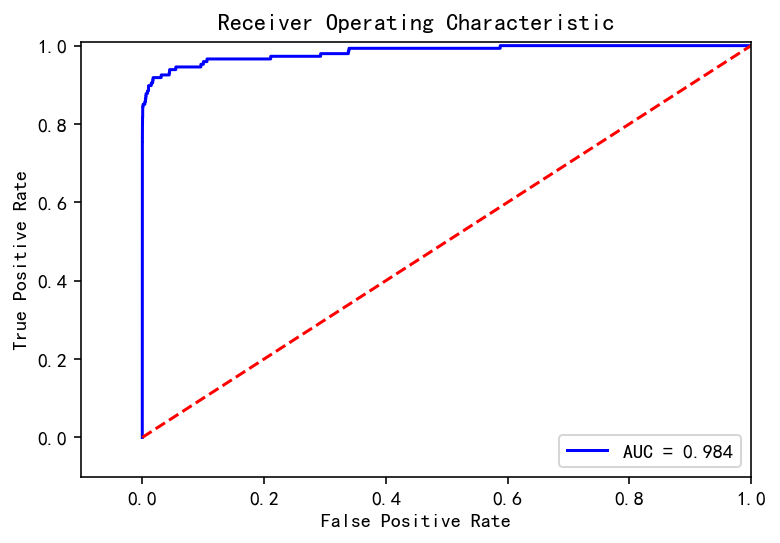

In [50]:
# Plot ROC

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right') # 设置legend的位置
plt.plot([0,1],[0,1],'r--') # red, --
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()